# 데이터 살펴보기

In [1]:
!pip install IPython
from IPython.display import Image

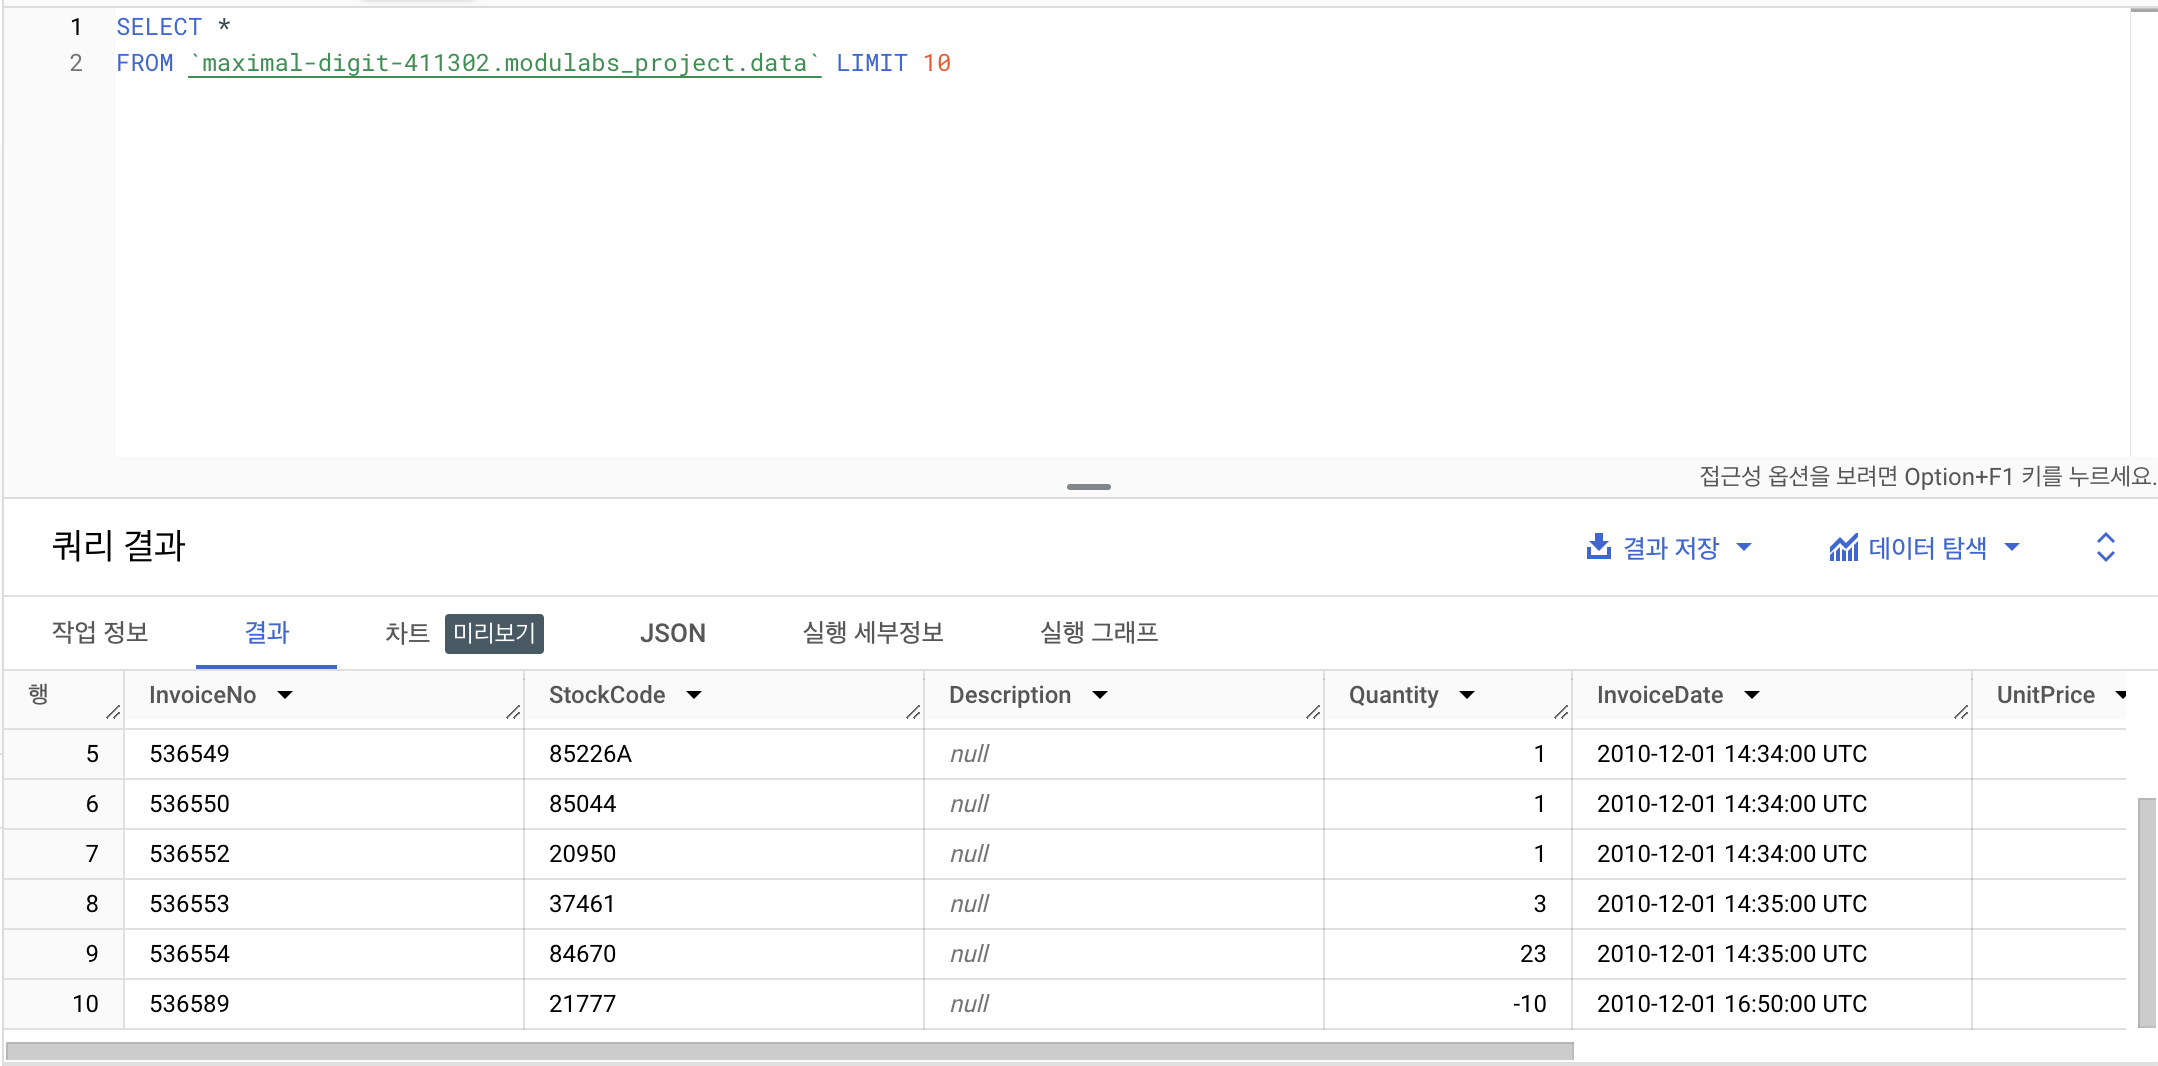

In [10]:
#간단하게 테이블에 있는 10개의 행만 출력해보겠습니다.
Image("스크린샷 2024-01-15 오후 12.17.55.png")

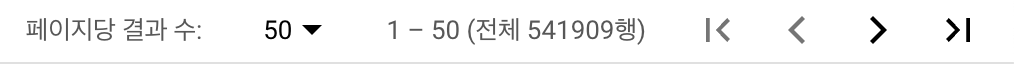

In [12]:
# 전체 데이터는 몇 행으로 구성되어 있는지 확인해 봅시다. 
Image("스크린샷 2024-01-15 오후 12.12.21.png")

# 15-4. 데이터 전처리(1): 결측치 제거

###중복값 확인

In [ ]:
#컬럼 별 누락된 값의 비율 계산

SELECT
    'InvoiceNo' AS column_name,
    ROUND(SUM(CASE WHEN InvoiceNo IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM `maximal-digit-411302.modulabs_project.data` 

UNION ALL로 연결해 보세요.

In [ ]:
# 예시 
SELECT
'InvoiceNo' AS Invoice,
ROUND(SUM(CASE WHEN InvoiceNo IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM maximal-digit-411302.modulabs_project.data
UNION ALL
SELECT
'StockCode' AS Stock, 
ROUND(SUM(CASE WHEN StockCode IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM `maximal-digit-411302.modulabs_project.data` 
UNION ALL
SELECT 
'Description' AS Description, 
ROUND(SUM(CASE WHEN Description IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM `maximal-digit-411302.modulabs_project.data` 
UNION ALL
SELECT 
'Quantity' AS Quantity, 
ROUND(SUM(CASE WHEN Quantity IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM `maximal-digit-411302.modulabs_project.data` 
UNION ALL
SELECT 
'InvoiceDate' AS InvoiceDate, 
ROUND(SUM(CASE WHEN InvoiceDate IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM `maximal-digit-411302.modulabs_project.data` 
UNION ALL
SELECT 
'UnitPrice' AS UnitPrice, 
ROUND(SUM(CASE WHEN UnitPrice IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM `maximal-digit-411302.modulabs_project.data` 
UNION ALL
SELECT 
'CustomerID' AS CustomerID, 
ROUND(SUM(CASE WHEN CustomerID IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM `maximal-digit-411302.modulabs_project.data` 
UNION ALL
SELECT 
'Country' AS Country, 
ROUND(SUM(CASE WHEN Country IS NULL THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS missing_percentage
FROM `maximal-digit-411302.modulabs_project.data` 

In [ ]:
#결측치 처리 전략
DELETE FROM `maximal-digit-411302.modulabs_project.data`
WHERE CustomerID IS NULL OR Description IS NULL

# 중복값 확인

In [ ]:
# 예시
SELECT COUNT(*) as duplicate_rows_count
FROM (
  SELECT InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, COUNT(*)
  FROM `maximal-digit-411302.modulabs_project.data`
  GROUP BY InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country
  HAVING COUNT(*) > 1
) AS duplicate_rows
#FROM `maximal-digit-411302.modulabs_project.data` 

# 중복값 처리

In [ ]:
SELECT DISTINCT *
FROM `maximal-digit-411302.modulabs_project.data`;

# 15-6. 데이터 전처리(3): 오류값 처리

In [ ]:
#InvoiceNo 살펴보기
SELECT COUNT(DISTINCT InvoiceNo) AS unique_invoice_count
FROM `maximal-digit-411302.modulabs_project.data`;

In [ ]:
# 이번에는 고유한 InvoiceNo를 앞에서부터 100개를 출력
SELECT DISTINCT InvoiceNo
FROM `maximal-digit-411302.modulabs_project.data`
LIMIT 100;
#FROM `maximal-digit-411302.modulabs_project.data` 

In [ ]:
#C'로 시작하는 행을 필터링할 수 있는 쿼리문을 작성해 주세요.
SELECT *
FROM `maximal-digit-411302.modulabs_project.data`
WHERE InvoiceNo LIKE 'C%'
LIMIT 100;

In [ ]:
#구매 건 상태가 Canceled 인 데이터의 비율(%)은 어떻게 되나요? 이를 계산할 수 있는 쿼리문을 작성하고, 취소 비율을 소수점 첫번째 자리까지 구해 주세요
SELECT  
ROUND(SUM(CASE WHEN Quantity < 0 THEN 1 ELSE 0 END) / COUNT(*) * 100, 1) AS cancel_ratio
FROM `maximal-digit-411302.modulabs_project.data`

In [ ]:
#이번엔 StockCode를 더 깊이 있게 살펴볼 차례입니다. 우선 고유한 StockCode의 개수를 출력해보겠습니다.
# 예시
SELECT StockCode, COUNT(*) AS sell_cnt 
FROM `maximal-digit-411302.modulabs_project.data`
GROUP BY StockCode
ORDER BY sell_cnt DESC
LIMIT 10;
#FROM `maximal-digit-411302.modulabs_project.data` 

In [ ]:
#StockCode의 문자열 내 숫자의 길이를 구해 봅시다.
WITH UniqueStockCodes AS (
  SELECT DISTINCT StockCode
  FROM `maximal-digit-411302.modulabs_project.data` 
)
SELECT
  LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count,
  COUNT(*) AS stock_cnt
FROM UniqueStockCodes
GROUP BY number_count
ORDER BY stock_cnt DESC;

In [ ]:
#숫자가 0~1개인 값들에는 어떤 코드들이 들어가 있는지를 확인해 봅시다.
SELECT DISTINCT StockCode, number_count
FROM (
  SELECT StockCode,
    LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count
  FROM `maximal-digit-411302.modulabs_project.data` 
) 
WHERE number_count BETWEEN 0 AND 1;

In [ ]:
#해당 코드 값들을 가지고 있는 데이터 수는 전체 데이터 수 대비 몇 퍼센트일까요? 소수점 두번째 자리까지 구해 주세요.
SELECT
  ROUND(COUNT(*) / (SELECT COUNT(*) FROM `maximal-digit-411302.modulabs_project.data` ) * 100, 2) AS percentage
FROM (
  SELECT StockCode,
    LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count
  FROM `maximal-digit-411302.modulabs_project.data`
) 
WHERE number_count BETWEEN 0 AND 1;

In [ ]:
#제품과 관련되지 않은 거래 기록을 제거하는 쿼리문을 작성해 주세요. 아래와 같은 결과가 나와야 합니다.
DELETE FROM `maximal-digit-411302.modulabs_project.data`
WHERE StockCode IN (
  SELECT DISTINCT StockCode
  FROM (
    SELECT StockCode,
      LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count
    FROM `maximal-digit-411302.modulabs_project.data` 
  ) 
  WHERE number_count BETWEEN 0 AND 1
);

# Description 살펴보기

In [ ]:
#먼저 데이터셋에서 고유한 Description 별 출현 빈도를 계산하고 상위 30개를 출력해 주세요.
SELECT Description, COUNT(*) AS description_cnt
FROM `maximal-digit-411302.modulabs_project.data` 
GROUP BY Description
ORDER BY description_cnt DESC
LIMIT 30;

In [19]:
#대소문자가 혼합된 Description이 있는지 확인해 봅시다.
SELECT DISTINCT Description
FROM `maximal-digit-411302.modulabs_project.data` 
WHERE REGEXP_CONTAINS(Description, r'[a-z]');

In [ ]:
#우선 서비스 관련 정보를 포함하는 행들을 제거하는 쿼리문을 작성해 보세요.
DELETE
FROM `maximal-digit-411302.modulabs_project.data` 
WHERE Description LIKE '%BANK CHARGES%'
   OR Description LIKE '%POST%';

In [ ]:
#이번에는 대소문자를 혼합하고 있는 데이터를 대문자로 표준화하는 쿼리문을 작성해 보세요.
CREATE OR REPLACE TABLE maximal-digit-411302.modulabs_project.data AS
SELECT
  * EXCEPT (Description),
  UPPER(Description) AS Description 
FROM `maximal-digit-411302.modulabs_project.data` 

# UnitPrice 살펴보기

In [ ]:
#UnitPrice의 최솟값, 최댓값, 평균을 구해 보세요.
SELECT
  MIN(UnitPrice) AS min_price,
  MAX(UnitPrice) AS max_price,
  AVG(UnitPrice) AS avg_price
FROM `maximal-digit-411302.modulabs_project.data` 

In [ ]:
#단가가 0원인 거래의 개수, 구매 수량(Quantity)의 최솟값, 최댓값, 평균을 구해 보세요.
SELECT
  COUNT(*) AS cnt_quantity,
  MIN(Quantity) AS min_quantity,
  MAX(Quantity) AS max_quantity,
  AVG(Quantity) AS avg_quantity
FROM `maximal-digit-411302.modulabs_project.data` 
WHERE UnitPrice = 0;

In [ ]:
#데이터의 수가 적은 걸 보니 무료 제품이라기보다 데이터 오류일 가능성이 더 높을 것 같습니다. 그래서 이 데이터(UnitPrice = 0)를 제거하고 일관된 데이터셋을 유지하도록 하겠습니다.
CREATE OR REPLACE TABLE maximal-digit-411302.modulabs_project.data AS 
SELECT *
FROM `maximal-digit-411302.modulabs_project.data` 
WHERE UnitPrice != 0;

# 15-7. RFM 스코어

In [ ]:
#우선 InvoiceDate를 '2010-12-01 08:26:00'와 같은 'YYYY-MM-DD HH:MM:SS' 형태에서 'YYYY-MM-DD' 형태로 날짜에 해당하는 부분만 남겨놓고 싶습니다. 이를 위해 DATE 함수를 활용하여 InvoiceDate 컬럼을 연월일 자료형으로 변경해 주세요.
SELECT FORMAT_DATE('%Y-%m-%d', DATE(InvoiceDate)) AS InvoiceDay, *
FROM `maximal-digit-411302.modulabs_project.data` 

In [ ]:
#우선 가장 최근 구매 일자를 MAX() 함수로 찾아보겠습니다.
SELECT
  MAX(InvoiceDate) AS most_recent_date,
  FORMAT_DATE('%Y-%m-%d', DATE(MAX(InvoiceDate))) AS InvoiceDay
FROM `maximal-digit-411302.modulabs_project.data`;

In [ ]:
#이번에는 유저 별로 가장 최근에 일어난 구매 정보를 정리해 봅시다. 유저 별로 가장 큰 InvoiceDay를 찾아서 가장 최근 구매일로 저장해 주겠습니다.
SELECT 
    CustomerID,
    FORMAT_DATE('%Y-%m-%d', DATE(MAX(InvoiceDate))) AS most_recent_purchase_date
FROM `maximal-digit-411302.modulabs_project.data` 
GROUP BY CustomerID;

In [ ]:
#다음에는 가장 최근 일자(most_recent_date)와 유저별 마지막 구매일(InvoiceDay)간의 차이를 계산하겠습니다.
SELECT
  CustomerID, 
  EXTRACT(DAY FROM MAX(InvoiceDay) OVER () - InvoiceDay) AS recency
FROM (
  SELECT 
    CustomerID,
    MAX(DATE(InvoiceDate)) AS InvoiceDay
  FROM `maximal-digit-411302.modulabs_project.data` 
  GROUP BY CustomerID
);

In [ ]:
#이제 최종 데이터 셋에 필요한 데이터들을 각각 정제해서 이어붙이도록 하겠습니다. 지금까지의 결과를 user_r이라는 이름의 테이블로 저장해 주세요.
# 예시
CREATE OR REPLACE TABLE maximal-digit-411302.modulabs_project.user_r AS
SELECT
  CustomerID,
  FORMAT_DATE('%Y-%m-%d', DATE(MAX(InvoiceDate))) AS most_recent_purchase_date,
  COUNT(DISTINCT InvoiceNo) AS total_purchases,
  SUM(UnitPrice * Quantity) AS total_spent
FROM `maximal-digit-411302.modulabs_project.data`
WHERE UnitPrice > 0
GROUP BY CustomerID;
#FROM `maximal-digit-411302.modulabs_project.data` 

In [ ]:
#우선 각 고객의 거래 건수를 세어 봅시다. 거래 건은 InvoiceNo를 기준으로 파악하면 되기 때문에, 고객마다 고유한 InvoiceNo의 수를 세어 주겠습니다.
SELECT
  CustomerID,
  COUNT(DISTINCT InvoiceNo) AS purchase_cnt
FROM `maximal-digit-411302.modulabs_project.data`
GROUP BY CustomerID;

In [ ]:
#그 다음으로는 각 고객 별로 구매한 아이템의 총 수량을 더해주겠습니다.
SELECT
  CustomerID,
  SUM(Quantity) AS item_cnt
FROM project_name.modulabs_project.data
GROUP BY CustomerID;

In [ ]:
#이제 위에서 구한 '1. 전체 거래 건수 계산'과 '2. 구매한 아이템의 총 수량 계산'의 결과를 합쳐서 user_rf라는 이름의 테이블에 저장해 주겠습니다.
CREATE OR REPLACE TABLE maximal-digit-411302.modulabs_project.user_rf AS

-- (1) 전체 거래 건수 계산
WITH purchase_cnt AS ( 
  SELECT
    CustomerID,
    COUNT(DISTINCT InvoiceNo) AS purchase_cnt
  FROM `maximal-digit-411302.modulabs_project.data` 
  GROUP BY CustomerID
),

-- (2) 구매한 아이템 총 수량 계산
item_cnt AS (
  SELECT
    CustomerID,
    SUM(Quantity) AS item_cnt
  FROM `maximal-digit-411302.modulabs_project.data` 
  GROUP BY CustomerID
)

-- 기존의 user_r에 (1)과 (2)를 통합
SELECT
  pc.CustomerID,
  pc.purchase_cnt,
  ic.item_cnt,
FROM purchase_cnt AS pc
JOIN item_cnt AS ic
  ON pc.CustomerID = ic.CustomerID
JOIN maximal-digit-411302.modulabs_project.user_r AS ur
  ON pc.CustomerID = ur.CustomerID;
#FROM `maximal-digit-411302.modulabs_project.data` 

# Monetary

In [ ]:
#고객별 총 지출액을 계산해 보세요. 소수점 첫째 자리에서 반올림하세요.
SELECT
  CustomerID,
  ROUND(SUM(UnitPrice * Quantity), 1) AS total_spent
FROM `maximal-digit-411302.modulabs_project.data`
GROUP BY CustomerID;

In [ ]:
#고객별 평균 거래 금액을 구하기 위해 1) data 테이블을 user_rf 테이블과 조인(LEFT JOIN) 한 후, 2) purchase_cnt로 나누어서 3) user_rfm 테이블로 저장해 봅시다.
CREATE OR REPLACE TABLE maximal-digit-411302.modulabs_project.user_rfm AS   
SELECT
  rf.CustomerID AS CustomerID,
  rf.purchase_cnt,
  rf.item_cnt,
  ut.user_total,
  IFNULL(ut.user_total / rf.purchase_cnt, 0) AS user_average
FROM maximal-digit-411302.modulabs_project.user_rf rf
LEFT JOIN (
  -- 고객 별 총 지출액
  SELECT
    CustomerID,
    ROUND(SUM(UnitPrice * Quantity), 1) AS user_total
  FROM `maximal-digit-411302.modulabs_project.data` 
  GROUP BY CustomerID
) ut
ON rf.CustomerID = ut.CustomerID;
#FROM `maximal-digit-411302.modulabs_project.data` 

In [ ]:
#위와 같은 과정을 거쳐서 생성된 최종 user_rfm 테이블을 출력해주겠습니다.
SELECT *
FROM maximal-digit-411302.modulabs_project.user_rfm;

# 15-8. 추가 Feature 추출

## 1. 구매하는 제품의 다양성


In [ ]:
CREATE OR REPLACE TABLE maximal-digit-411302.modulabs_project.user_data AS  
WITH unique_products AS (
  SELECT
    CustomerID,
    COUNT(DISTINCT StockCode) AS unique_products
  FROM `maximal-digit-411302.modulabs_project.data` 
  GROUP BY CustomerID
)
SELECT ur.*, up.* EXCEPT (CustomerID)
FROM maximal-digit-411302.modulabs_project.user_rfm AS ur
JOIN unique_products AS up
ON ur.CustomerID = up.CustomerID;

## 2. 평균 구매 주기

In [ ]:
CREATE OR REPLACE TABLE maximal-digit-411302.modulabs_project.user_data AS 
WITH purchase_intervals AS (
  -- (2) 고객 별 구매와 구매 사이의 평균 소요 일수
  SELECT
    CustomerID,
    CASE WHEN ROUND(AVG(interval_), 2) IS NULL THEN 0 ELSE ROUND(AVG(interval_), 2) END AS average_interval
  FROM (
    -- (1) 구매와 구매 사이에 소요된 일수
    SELECT
      CustomerID,
      DATE_DIFF(InvoiceDate, LAG(InvoiceDate) OVER (PARTITION BY CustomerID ORDER BY InvoiceDate), DAY) AS interval_
    FROM `maximal-digit-411302.modulabs_project.data` 
    WHERE CustomerID IS NOT NULL
  )
  GROUP BY CustomerID
)

SELECT u.*, pi.* EXCEPT (CustomerID)
FROM maximal-digit-411302.modulabs_project.user_data AS u
LEFT JOIN purchase_intervals AS pi
ON u.CustomerID = pi.CustomerID;
#FROM `maximal-digit-411302.modulabs_project.data` 

## 3. 구매 취소 경향성

In [ ]:
CREATE OR REPLACE TABLE maximal-digit-411302.modulabs_project.user_data AS

WITH TransactionInfo AS (
  SELECT
    CustomerID,
    COUNTIF(InvoiceNo LIKE 'C%') AS total_transactions,
    ROUND(COUNTIF(InvoiceNo LIKE 'C%') / COUNT(DISTINCT InvoiceNo), 2) AS cancel_frequency
  FROM `maximal-digit-411302.modulabs_project.data` 
  GROUP BY CustomerID
)

SELECT u.*, t.* EXCEPT(CustomerID), IFNULL(t.cancel_frequency, 0) AS cancel_rate
FROM `maximal-digit-411302.modulabs_project.data` AS u
LEFT JOIN TransactionInfo AS t
ON u.CustomerID = t.CustomerID;
#FROM `maximal-digit-411302.modulabs_project.data` 